## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.095915  0.215960  1.029275 -1.589882  1.341760  0.160623
1 -0.109625 -1.536153 -1.249170 -0.230906 -0.946231 -1.388460
2  0.976452  0.763819  0.488482  0.053707  0.848110  1.091518
3 -1.005224  0.889050  1.599682 -1.057695  1.235895  0.388725
4 -1.012094  0.799765  0.501260 -1.562530  0.247450 -1.124749


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9505051	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.9423485	total: 67.2ms	remaining: 33.6s
2:	learn: 0.9327213	total: 67.8ms	remaining: 22.5s
3:	learn: 0.9245912	total: 68.4ms	remaining: 17s
4:	learn: 0.9178506	total: 69ms	remaining: 13.7s
5:	learn: 0.9087275	total: 69.7ms	remaining: 11.5s
6:	learn: 0.8987330	total: 70.3ms	remaining: 9.98s
7:	learn: 0.8911541	total: 70.9ms	remaining: 8.8s
8:	learn: 0.8833980	total: 71.5ms	remaining: 7.87s
9:	learn: 0.8758713	total: 72.1ms	remaining: 7.14s
10:	learn: 0.8688252	total: 72.6ms	remaining: 6.53s
11:	learn: 0.8603533	total: 73.1ms	remaining: 6.02s
12:	learn: 0.8523117	total: 73.7ms	remaining: 5.59s
13:	learn: 0.8445127	total: 74.3ms	remaining: 5.23s
14:	learn: 0.8378885	total: 74.9ms	remaining: 4.92s
15:	learn: 0.8316361	total: 75.4ms	remaining: 4.63s
16:	learn: 0.8241936	total: 75.8ms	remaining: 4.38s
17:	learn: 0.8153980	total: 76.4ms	remaining: 4.17s
18:	learn: 0.8061203	total: 76.8ms	remaining: 3.9

90:	learn: 0.4420969	total: 110ms	remaining: 1.1s
91:	learn: 0.4387992	total: 111ms	remaining: 1.09s
92:	learn: 0.4354474	total: 111ms	remaining: 1.08s
93:	learn: 0.4316880	total: 112ms	remaining: 1.07s
94:	learn: 0.4284500	total: 112ms	remaining: 1.07s
95:	learn: 0.4255207	total: 113ms	remaining: 1.06s
96:	learn: 0.4219488	total: 113ms	remaining: 1.05s
97:	learn: 0.4191282	total: 113ms	remaining: 1.04s
98:	learn: 0.4156888	total: 114ms	remaining: 1.03s
99:	learn: 0.4127675	total: 114ms	remaining: 1.03s
100:	learn: 0.4104370	total: 114ms	remaining: 1.02s
101:	learn: 0.4073205	total: 115ms	remaining: 1.01s
102:	learn: 0.4047087	total: 115ms	remaining: 1s
103:	learn: 0.4028504	total: 116ms	remaining: 997ms
104:	learn: 0.4002124	total: 116ms	remaining: 989ms
105:	learn: 0.3965769	total: 116ms	remaining: 982ms
106:	learn: 0.3935068	total: 117ms	remaining: 975ms
107:	learn: 0.3910551	total: 117ms	remaining: 968ms
108:	learn: 0.3887812	total: 118ms	remaining: 962ms
109:	learn: 0.3856508	tota

246:	learn: 0.1573555	total: 187ms	remaining: 570ms
247:	learn: 0.1562348	total: 188ms	remaining: 569ms
248:	learn: 0.1552027	total: 188ms	remaining: 567ms
249:	learn: 0.1542116	total: 188ms	remaining: 565ms
250:	learn: 0.1528675	total: 189ms	remaining: 563ms
251:	learn: 0.1517604	total: 189ms	remaining: 562ms
252:	learn: 0.1508536	total: 190ms	remaining: 561ms
253:	learn: 0.1496670	total: 190ms	remaining: 559ms
254:	learn: 0.1489414	total: 191ms	remaining: 557ms
255:	learn: 0.1478788	total: 191ms	remaining: 555ms
256:	learn: 0.1469313	total: 192ms	remaining: 554ms
257:	learn: 0.1456652	total: 192ms	remaining: 553ms
258:	learn: 0.1445093	total: 193ms	remaining: 551ms
259:	learn: 0.1434044	total: 193ms	remaining: 550ms
260:	learn: 0.1422499	total: 194ms	remaining: 549ms
261:	learn: 0.1414159	total: 194ms	remaining: 547ms
262:	learn: 0.1405190	total: 195ms	remaining: 546ms
263:	learn: 0.1394636	total: 195ms	remaining: 544ms
264:	learn: 0.1384776	total: 196ms	remaining: 542ms
265:	learn: 

456:	learn: 0.0413809	total: 293ms	remaining: 349ms
457:	learn: 0.0411263	total: 294ms	remaining: 348ms
458:	learn: 0.0409257	total: 294ms	remaining: 347ms
459:	learn: 0.0407619	total: 295ms	remaining: 346ms
460:	learn: 0.0404998	total: 295ms	remaining: 345ms
461:	learn: 0.0402651	total: 296ms	remaining: 345ms
462:	learn: 0.0400086	total: 296ms	remaining: 344ms
463:	learn: 0.0397668	total: 297ms	remaining: 343ms
464:	learn: 0.0395698	total: 297ms	remaining: 342ms
465:	learn: 0.0393764	total: 297ms	remaining: 341ms
466:	learn: 0.0391054	total: 298ms	remaining: 340ms
467:	learn: 0.0388743	total: 298ms	remaining: 339ms
468:	learn: 0.0386532	total: 300ms	remaining: 339ms
469:	learn: 0.0383888	total: 300ms	remaining: 339ms
470:	learn: 0.0382040	total: 301ms	remaining: 338ms
471:	learn: 0.0379593	total: 301ms	remaining: 337ms
472:	learn: 0.0377204	total: 302ms	remaining: 336ms
473:	learn: 0.0374197	total: 302ms	remaining: 335ms
474:	learn: 0.0372397	total: 303ms	remaining: 335ms
475:	learn: 

610:	learn: 0.0196357	total: 372ms	remaining: 237ms
611:	learn: 0.0195323	total: 372ms	remaining: 236ms
612:	learn: 0.0195092	total: 373ms	remaining: 235ms
613:	learn: 0.0194864	total: 373ms	remaining: 235ms
614:	learn: 0.0194322	total: 374ms	remaining: 234ms
615:	learn: 0.0193255	total: 374ms	remaining: 233ms
616:	learn: 0.0193032	total: 375ms	remaining: 232ms
617:	learn: 0.0192812	total: 375ms	remaining: 232ms
618:	learn: 0.0191771	total: 375ms	remaining: 231ms
619:	learn: 0.0191553	total: 376ms	remaining: 230ms
620:	learn: 0.0190520	total: 376ms	remaining: 230ms
621:	learn: 0.0190304	total: 377ms	remaining: 229ms
622:	learn: 0.0189821	total: 377ms	remaining: 228ms
623:	learn: 0.0189170	total: 378ms	remaining: 228ms
624:	learn: 0.0188091	total: 378ms	remaining: 227ms
625:	learn: 0.0187612	total: 379ms	remaining: 226ms
626:	learn: 0.0187017	total: 379ms	remaining: 225ms
627:	learn: 0.0186438	total: 380ms	remaining: 225ms
628:	learn: 0.0185304	total: 380ms	remaining: 224ms
629:	learn: 

824:	learn: 0.0091748	total: 478ms	remaining: 101ms
825:	learn: 0.0091325	total: 478ms	remaining: 101ms
826:	learn: 0.0091175	total: 479ms	remaining: 100ms
827:	learn: 0.0090873	total: 479ms	remaining: 99.5ms
828:	learn: 0.0090786	total: 480ms	remaining: 98.9ms
829:	learn: 0.0090393	total: 480ms	remaining: 98.3ms
830:	learn: 0.0089930	total: 481ms	remaining: 97.7ms
831:	learn: 0.0089665	total: 481ms	remaining: 97.1ms
832:	learn: 0.0089576	total: 481ms	remaining: 96.5ms
833:	learn: 0.0089287	total: 482ms	remaining: 95.9ms
834:	learn: 0.0089199	total: 482ms	remaining: 95.3ms
835:	learn: 0.0089109	total: 483ms	remaining: 94.7ms
836:	learn: 0.0088730	total: 483ms	remaining: 94.1ms
837:	learn: 0.0088311	total: 484ms	remaining: 93.5ms
838:	learn: 0.0087925	total: 484ms	remaining: 92.9ms
839:	learn: 0.0087557	total: 485ms	remaining: 92.3ms
840:	learn: 0.0087127	total: 485ms	remaining: 91.7ms
841:	learn: 0.0086768	total: 486ms	remaining: 91.1ms
842:	learn: 0.0086610	total: 486ms	remaining: 90.

980:	learn: 0.0055963	total: 556ms	remaining: 10.8ms
981:	learn: 0.0055907	total: 556ms	remaining: 10.2ms
982:	learn: 0.0055852	total: 557ms	remaining: 9.63ms
983:	learn: 0.0055572	total: 557ms	remaining: 9.06ms
984:	learn: 0.0055518	total: 558ms	remaining: 8.49ms
985:	learn: 0.0055312	total: 558ms	remaining: 7.93ms
986:	learn: 0.0055147	total: 559ms	remaining: 7.36ms
987:	learn: 0.0054868	total: 559ms	remaining: 6.79ms
988:	learn: 0.0054666	total: 560ms	remaining: 6.22ms
989:	learn: 0.0054529	total: 560ms	remaining: 5.66ms
990:	learn: 0.0054331	total: 561ms	remaining: 5.1ms
991:	learn: 0.0054094	total: 562ms	remaining: 4.53ms
992:	learn: 0.0053934	total: 562ms	remaining: 3.96ms
993:	learn: 0.0053740	total: 563ms	remaining: 3.4ms
994:	learn: 0.0053630	total: 563ms	remaining: 2.83ms
995:	learn: 0.0053496	total: 564ms	remaining: 2.26ms
996:	learn: 0.0053237	total: 564ms	remaining: 1.7ms
997:	learn: 0.0053047	total: 565ms	remaining: 1.13ms
998:	learn: 0.0052916	total: 565ms	remaining: 565

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

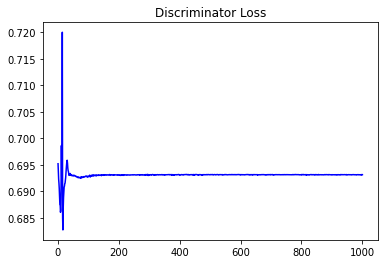

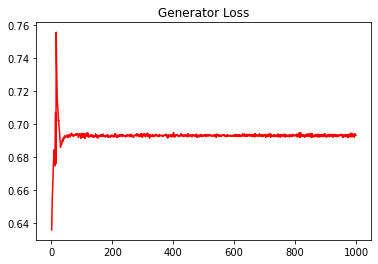

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18959359650203883


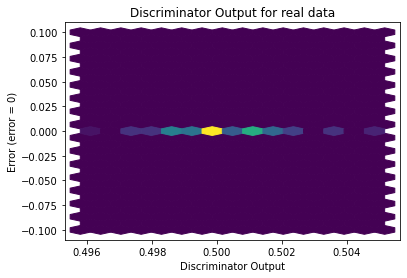

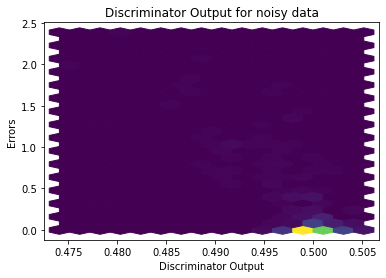

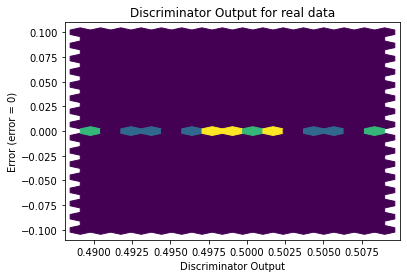

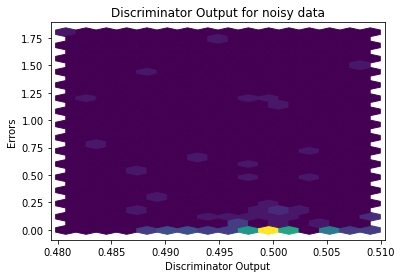

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


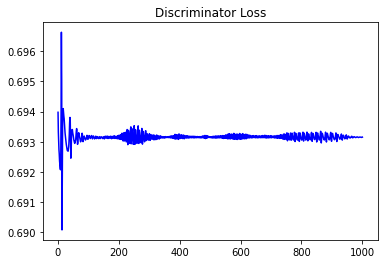

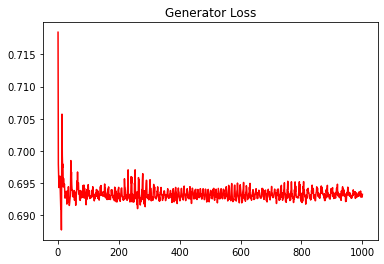

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21557511690670159


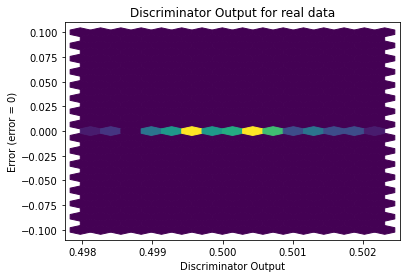

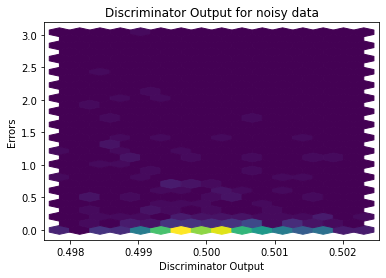

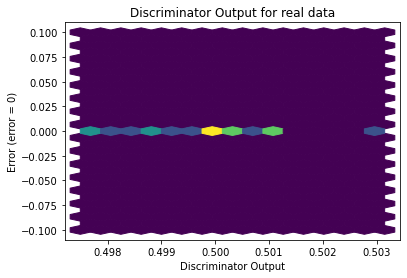

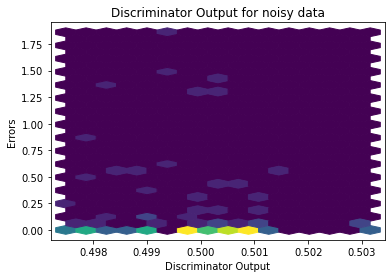

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0380]], requires_grad=True)
